In [ ]:
#Names : Banuka Kumara Ambegoda , Ravisanka Rashmika Abeyrathne Siriwardenage
#Date : 2022-08-14
#PROG 1870 - Final Project

#Please Run the following cell twice because the database connectivity gives an driver error the first time
#which then get fixed when u run it the second time. (No idea why this error occures.)

In [3]:
!pip install pymongo
#Challenge 1
from pymongo import MongoClient as MC
import json
import csv
import pyodbc

# csv to json
print("Transforming json data now >>>>")
with open("C:\project_files\olympics.csv", "r") as f:
    reader = csv.reader(f)
    next(reader)
    data = []
    for row in reader:
        data.append({"country": row[0], "summer": {"gold": row[2], "silver": row[3], "bronze": row[4]}, "winter":
                    {"gold": row[6], "silver": row[7], "bronze": row[8]}})
    
    path = "C:\project_files\medals.json"
    with open (path, "w") as f:
        json.dump(data, f, indent=4)
print(f"Made json file: {path} >>>>")
        
#csv to mongo collection
server = MC("localhost", 27017)
db = server["project"]
db.data.insert_many(data)
print("Data added to MongoDB >>>>")

#csv to sql
coll = db.data
result = list(coll.find({}, {"_id":0,"country":1}))
result1 = list(coll.find({}, {"_id":0,"country":1, "summer":1, "winter":1}))


#csv to sql
conn = pyodbc.connect(  'Driver={SQL Server};'
                        'Server=.\SQLEXPRESS;'
                        'Trusted_Connection=yes;')
cursor = conn.cursor()

create_db = "CREATE DATABASE project"

cursor.execute(create_db)

cursor.close()
conn.close()

conn = pyodbc.connect(  'Driver={SQL Server};'
                        'Server=.\SQLEXPRESS;'
                        'Database=project;'
                        'Trusted_Connection=yes;')
cursor = conn.cursor()

create_tbl_country= """
    CREATE TABLE country(
        countryID BIGINT IDENTITY(1,1) PRIMARY KEY NOT NULL,
        countryName VARCHAR(100)
    );
"""
cursor.execute(create_tbl_country)

create_tbl_countryMedals= """
    CREATE TABLE country_medals(
       cmSeason VARCHAR(1) NOT NULL,
       cmGold INT,
       cmSilver INT,
       cmBronze INT,
       countryID BIGINT FOREIGN KEY REFERENCES country(countryID),
       cmID BIGINT IDENTITY(1,1) PRIMARY KEY NOT NULL
    );
"""
cursor.execute(create_tbl_countryMedals)

conn.commit()

cursor.close()
conn.close()

conn = pyodbc.connect(  'Driver={SQL Server};'
                        'Server=.\SQLEXPRESS;'
                        'Database=project;'
                        'Trusted_Connection=yes;')
cursor = conn.cursor()

for d in result:
        conn.execute(f"INSERT INTO project.dbo.country ([countryName]) VALUES (''{repr(d['country'])}'')")

for d in result1:
        query = f"SELECT countryID FROM country WHERE [countryName] = ''{repr(d['country'])}''" 
        val = list(cursor.execute(query))
        conn.execute(f"INSERT INTO project.dbo.country_medals VALUES ('S','{d['summer']['gold']}', '{d['summer']['silver']}', '{d['summer']['bronze']}','{val[0][0]}')")
        conn.execute(f"INSERT INTO project.dbo.country_medals VALUES ('W','{d['winter']['gold']}', '{d['winter']['silver']}', '{d['winter']['bronze']}','{val[0][0]}')")

conn.commit()

cursor.close()
conn.close()

conn = pyodbc.connect(  'Driver={SQL Server};'
                        'Server=.\SQLEXPRESS;'
                        'Database=project;'
                        'Trusted_Connection=yes;')
cursor = conn.cursor()

query = "SELECT * FROM country"
new_result = list(cursor.execute(query))

cursor.close()
conn.close()
print("Created and added SQL tables and data >>>>")

Made json file: C:\project_files\medals.json >>>>
Data added to MongoDB >>>>
Created and added SQL tables and data >>>>



Summer Top 3 Countries 

 Country
United States (USA) [P] [Q] [R] [Z]    7817
Soviet Union (URS) [URS]               3228
Great Britain (GBR) [GBR] [Z]          2268
Name: ScoreSummer, dtype: int64 



Winter Top 3 Countries 

 Country
Norway (NOR) [Q]                       1023
United States (USA) [P] [Q] [R] [Z]     870
Germany (GER) [GER] [Z]                 677
Name: ScoreWinter, dtype: int64 



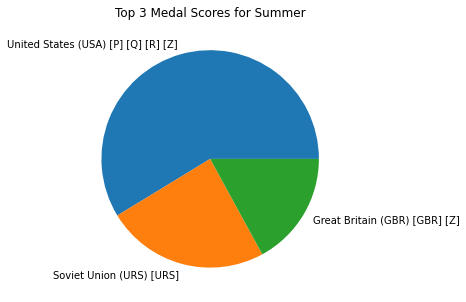

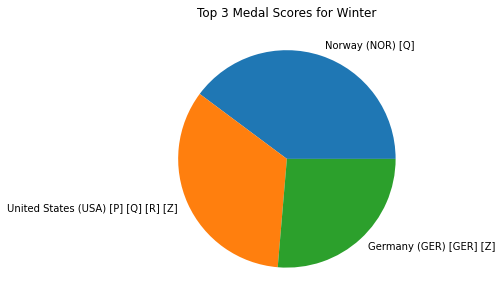

In [4]:
#Challenge 2
import pandas as pd

# Getting CSV data to pandas
import_df = pd.read_csv("C:\project_files\olympics.csv",
                        usecols=["Country","SG","SS","SB","WG","WS","WB"])

#Gretting scores
import_df["ScoreSummer"] = import_df["SG"]*5 + import_df["SS"]*3 + import_df["SB"]
import_df["ScoreWinter"] = import_df["WG"]*5 + import_df["WS"]*3 + import_df["WB"]

#Plotting and outputs

summer_df = import_df.nlargest(3, 'ScoreSummer')
winter_df = import_df.nlargest(3, 'ScoreWinter')

summer_df.set_index('Country', inplace=True)
winter_df.set_index('Country', inplace=True)

summer_out = summer_df.loc[:,"ScoreSummer"]
print(f"\nSummer Top 3 Countries \n\n {summer_out} \n\n\n")
plot = summer_df.plot.pie(y='ScoreSummer', figsize=(5, 5), title ='Top 3 Medal Scores for Summer', label = '', legend=False)

winter_out = winter_df.loc[:,"ScoreWinter"]
print(f"Winter Top 3 Countries \n\n {winter_out} \n")
plot = winter_df.plot.pie(y='ScoreWinter', figsize=(5, 5), title ='Top 3 Medal Scores for Winter', label = '', legend=False)